# Student Activity: Portfolio Planner

## Part 1: Portfolio Optimization via Risk Evaluation

Harold has been asked to research the following ten stocks:

* Bank of New York Mellon (BK)
* Diamondback Energy (FANG)
* Johnson & Johnson (JNJ)
* Southwest Airlines Co (LUV)
* Micron Technologies (MU)
* Nike (NKE)
* Starbucks (SBUX)
* AT&T (T)
* Western Digital (WDC)
* Westrock (WRK)

Harold has been tasked with sorting stocks by risk/volatility, filtering out the top five stocks with the highest volatility and assigning the remaining stocks portfolio weights of 0.5, 0.2, 0.15, 0.10, and 0.05 (from least risk to most risk). He also needs to show the returns over time of a hypothetical $10,000 investment in such a portfolio.

Use the Pandas library to help Harold determine the risk profile of the ten stocks, filter out the top-five highly volatile stocks, assign portfolio weights to each corresponding stock, and plot the returns of a $10,000 investment in such a portfolio over time.

---

### Instructions - Part 1: Portfolio Optimization via Risk Evaluation

#### Import Libraries and Dependencies

In [32]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

#### Read CSVs as DataFrames 

In [33]:
# Set the file paths
bk_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\bk_data.csv")
fang_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\fang_data.csv")
jnj_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\jnj_data.csv")
luv_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\luv_data.csv")
mu_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\mu_data.csv")
nke_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\nke_data.csv")
sbux_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\sbux_data.csv")
t_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\t_data.csv")
wdc_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\wdc_data.csv")
wrk_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\wrk_data.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nke_df = pd.read_csv(nke_data, index_col="date", infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv(sbux_data, index_col="date", infer_datetime_format=True, parse_dates=True)
t_df = pd.read_csv(t_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wdc_df = pd.read_csv(wdc_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wrk_df = pd.read_csv(wrk_data, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from one DataFrame
jnj_df.shape

(1659, 1)

In [34]:
jnj_df.drop_duplicates()

,close
date,
2019-05-20,109.66
2019-05-17,111.02
2019-05-16,110.63
2019-05-15,109.06
2019-05-14,109.11
...,...
2012-10-24,17.39
2012-10-19,17.41
2012-10-18,17.70


In [35]:
jnj_df.dropna()

,close
date,
2019-05-20,109.66
2019-05-17,111.02
2019-05-16,110.63
2019-05-15,109.06
2019-05-14,109.11
...,...
2012-10-18,17.70
2012-10-17,17.70
2012-10-16,17.79


In [36]:
jnj_df.reset_index(drop=True)

,close
0,109.66
1,111.02
2,110.63
3,109.06
4,109.11
...,...
1654,17.70
1655,17.70
1656,17.79
1657,17.75


#### Combine DataFrames, Sort Index, and Rename Columns

In [37]:
# Create a new DataFrame where the columns are the closing prices for each ticker
combined_df = pd.concat([bk_df, fang_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis='columns', join='inner')
#combined_df = pd.concat([bk_df, fang_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis='columns', join='inner')
combined_df.columns = ['BK', 'FANG', 'LUV', 'MU', 'NKE', 'SBUX', 'T', 'WDC', 'WRK']
combined_df.sort_index(inplace=True)
combined_df
# Sort datetime index in ascending order (past to present)

# Set column names

# Display a few rows


,BK,FANG,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,
2015-06-24,43.29,77.955,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.390,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.250,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.160,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.380,33.09,18.84,54.010,53.615,35.52,78.42,56.2781
...,...,...,...,...,...,...,...,...,...
2019-05-14,47.01,109.110,51.65,38.51,83.670,77.060,31.09,44.63,37.1900
2019-05-15,46.51,109.060,52.01,38.41,84.010,77.760,31.25,45.49,37.4400
2019-05-16,46.54,110.630,52.59,37.31,84.280,78.900,31.62,45.09,37.4200


#### Calculate Daily Returns

In [38]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,BK,FANG,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


#### Evaluate Riskiness of Stocks

In [39]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
annualised_volatity = daily_returns.std() * np.sqrt(252)

# Sort values in ascending order. Display the values.
annualised_volatity.sort_values(ascending=True)

T       0.187579
SBUX    0.206805
BK      0.224967
NKE     0.246045
LUV     0.280021
WRK     0.303601
FANG    0.370840
WDC     0.415605
MU      0.479955
dtype: float64

#### Drop High Volatility Stocks

In [40]:
# Drop the five stocks with the highest volatility in daily returns
annualised_volatity_less = annualised_volatity.drop(annualised_volatity[annualised_volatity > 0.30].index)
annualised_volatity_less.sort_values(ascending=True)

T       0.187579
SBUX    0.206805
BK      0.224967
NKE     0.246045
LUV     0.280021
dtype: float64

In [41]:
daily_returns_new = daily_returns[['T', 'SBUX', 'BK', 'NKE', 'LUV']]
daily_returns_new

,T,SBUX,BK,NKE,LUV
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,0.011179,0.006703,-0.010164,-0.009414,0.004076
2015-06-26,-0.001658,0.010172,0.003034,0.042672,-0.004929
2015-06-29,-0.009690,-0.019590,-0.027687,-0.018594,-0.033217
2015-06-30,-0.006989,0.001214,0.004307,0.003251,-0.002712
...,...,...,...,...,...
2019-05-14,0.020348,0.004956,-0.002969,0.013813,0.011951
2019-05-15,0.005146,0.009084,-0.010636,0.004064,0.006970
2019-05-16,0.011840,0.014660,0.000645,0.003214,0.011152


#### Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

Set weights for the corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return.

In [42]:
# Set weights for corresponding risk profile of stocks: BK, LUV, NKE, SBUX, T
weights = [.5, 0.2, 0.15, 0.10, 0.05]

# Use the `dot` function to sum the product each weight and the corresponding stock daily return. Diplay sample values

portfolio_returns = daily_returns_new.dot(weights)
portfolio_returns

date
2015-06-24         NaN
2015-06-25    0.004668
2015-06-26    0.005681
2015-06-29   -0.016436
2015-06-30   -0.002416
                ...   
2019-05-14    0.012699
2019-05-15    0.003549
2019-05-16    0.009828
2019-05-17    0.001400
2019-05-20   -0.002183
Length: 983, dtype: float64

#### Calculate Cumulative Returns

In [43]:
# Use the `cumprod` function to calculate cumulative returns
cum_returns = (1 + portfolio_returns).cumprod()
cum_returns

date
2015-06-24         NaN
2015-06-25    1.004668
2015-06-26    1.010376
2015-06-29    0.993769
2015-06-30    0.991368
                ...   
2019-05-14    1.132313
2019-05-15    1.136332
2019-05-16    1.147500
2019-05-17    1.149107
2019-05-20    1.146599
Length: 983, dtype: float64

#### Plot Return of Portfolio Starting with Initial Investment of `$10,000`

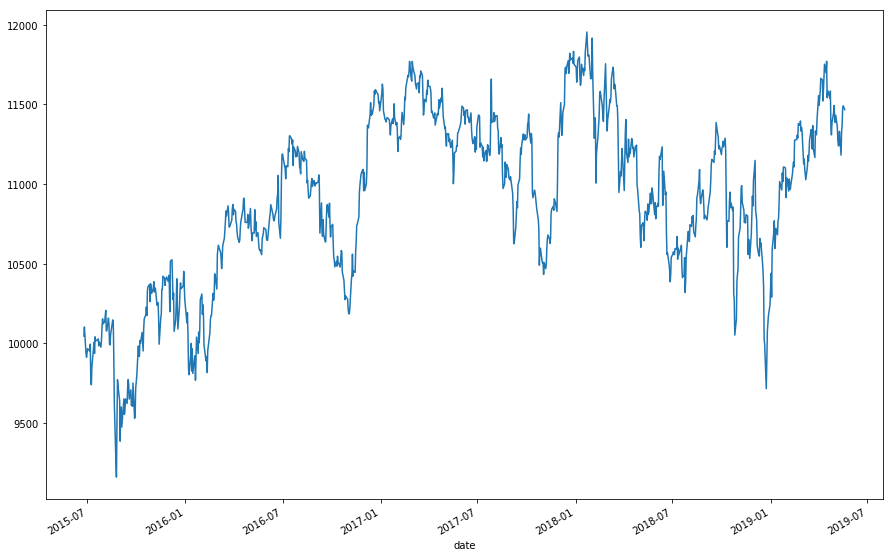

In [44]:
# Set initial investment
initial_investment = 10000

# Compute cumulative returns
cum_returns = (1 + portfolio_returns).cumprod()

cumulative_profit = initial_investment * cum_returns
cumulative_profit

# Plot the returns of the investment
cumulative_profit.plot(figsize=(15,10))

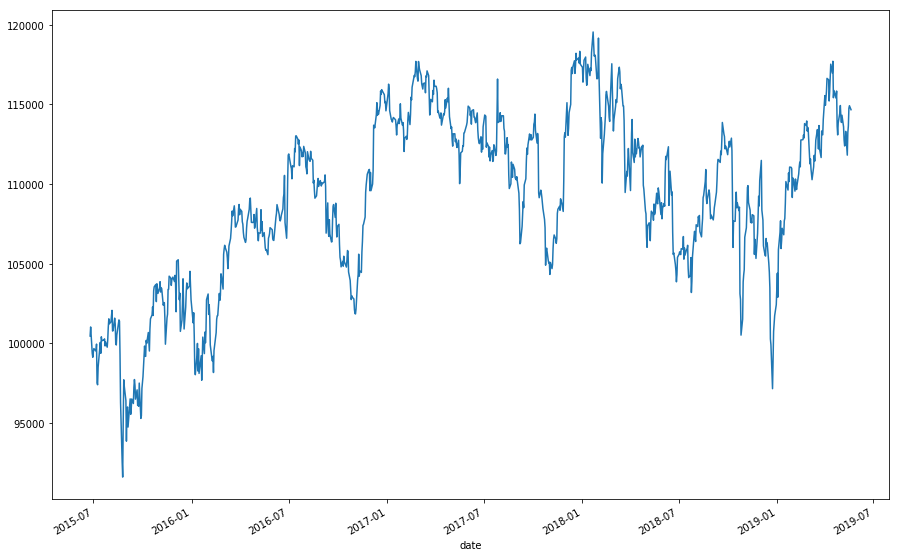

In [45]:
# Set initial investment
initial_investment = 100000

# Compute cumulative returns
cum_returns = (1 + portfolio_returns).cumprod()

cumulative_profit = initial_investment * cum_returns
cumulative_profit

# Plot the returns of the investment
cumulative_profit.plot(figsize=(15,10))